In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files

# upload csv file of IMDB's 10,000 best movies
uploaded = files.upload()

Saving movies 2.csv to movies 2.csv


In [ ]:
df = pd.read_csv('movies 2.csv')
df

,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross
0,The Shawshank Redemption,1994,142,R,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",9.3,82.0,2780534,28.34
1,The Godfather,1972,175,R,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",9.2,100.0,1935895,134.97
2,Ramayana: The Legend of Prince Rama,1993,135,PG,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",9.2,NaN,12470,NaN
3,The Chaos Class,1975,87,NaN,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",9.2,NaN,42018,NaN
4,Daman,2022,121,NaN,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",9.1,NaN,13372,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9844,Welcome to the Jungle,I) (2013,95,Not Rated,"Action, Adventure, Comedy","['Rob Meltzer', 'Jean-Claude Van Damme', 'Adam...","['Jean-Claude Van Damme', 'Adam Brody', 'Rob H...",4.9,25.0,13770,NaN
9845,Boat Trip,2002,94,R,Comedy,"['Mort Nathan', 'Cuba Gooding Jr.', 'Horatio S...","['Cuba Gooding Jr.', 'Horatio Sanz', 'Roselyn ...",4.9,18.0,31972,8.59
9846,Did You Hear About the Morgans?,2009,103,PG-13,"Comedy, Drama, Romance","['Marc Lawrence', 'Hugh Grant', 'Sarah Jessica...","['Hugh Grant', 'Sarah Jessica Parker', 'Sam El...",4.9,27.0,41830,29.58
9847,The Crow: Salvation,2000,102,R,"Action, Crime, Fantasy","['Bharat Nalluri', 'Kirsten Dunst', 'William A...","['Kirsten Dunst', 'William Atherton', 'Debbie ...",4.9,NaN,11938,NaN


# Clean data

In [ ]:
import re

#Remove non numeric characters from string in year
def remove_non_numeric_characters(string):
    return re.sub('[^0-9]', '', string)

df['year'] = df['year'].apply(remove_non_numeric_characters)

median_revenue_by_year = df.groupby('year')['gross'].median()
# Iterate through the DataFrame to fill missing gross revenue values
for index, row in df.iterrows():
    if pd.isnull(row['gross']):
        df.at[index, 'gross'] = median_revenue_by_year[row['year']]
df

,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross
0,The Shawshank Redemption,1994,142,R,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",9.3,82.0,2780534,28.34
1,The Godfather,1972,175,R,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",9.2,100.0,1935895,134.97
2,Ramayana: The Legend of Prince Rama,1993,135,PG,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",9.2,NaN,12470,24.76
3,The Chaos Class,1975,87,NaN,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",9.2,NaN,42018,12.48
4,Daman,2022,121,NaN,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",9.1,NaN,13372,93.88
...,...,...,...,...,...,...,...,...,...,...,...
9844,Welcome to the Jungle,2013,95,Not Rated,"Action, Adventure, Comedy","['Rob Meltzer', 'Jean-Claude Van Damme', 'Adam...","['Jean-Claude Van Damme', 'Adam Brody', 'Rob H...",4.9,25.0,13770,5.31
9845,Boat Trip,2002,94,R,Comedy,"['Mort Nathan', 'Cuba Gooding Jr.', 'Horatio S...","['Cuba Gooding Jr.', 'Horatio Sanz', 'Roselyn ...",4.9,18.0,31972,8.59
9846,Did You Hear About the Morgans?,2009,103,PG-13,"Comedy, Drama, Romance","['Marc Lawrence', 'Hugh Grant', 'Sarah Jessica...","['Hugh Grant', 'Sarah Jessica Parker', 'Sam El...",4.9,27.0,41830,29.58
9847,The Crow: Salvation,2000,102,R,"Action, Crime, Fantasy","['Bharat Nalluri', 'Kirsten Dunst', 'William A...","['Kirsten Dunst', 'William Atherton', 'Debbie ...",4.9,NaN,11938,27.44


In [ ]:
NaN_df = pd.DataFrame({'NaNs': df.isnull().sum()})
NaN_df

,NaNs
title,0
year,0
runtime,0
certificate,356
genre,0
director,0
stars,0
rating,0
metascore,1973
votes,0


In [ ]:
#select features
selected_columns = ['title', 'genre', 'year', 'runtime','rating','metascore','gross']
df2 = df[selected_columns]

#drop Nan from dataframe
df3 = df2.dropna()
df3

,title,genre,year,runtime,rating,metascore,gross
0,The Shawshank Redemption,Drama,1994,142,9.3,82.0,28.34
1,The Godfather,"Crime, Drama",1972,175,9.2,100.0,134.97
5,The Dark Knight,"Action, Crime, Drama",2008,152,9.0,84.0,534.86
6,Schindler's List,"Biography, Drama, History",1993,195,9.0,95.0,96.90
7,12 Angry Men,"Crime, Drama",1957,96,9.0,97.0,4.36
...,...,...,...,...,...,...,...
9843,Black Knight,"Adventure, Comedy, Fantasy",2001,95,4.9,32.0,33.42
9844,Welcome to the Jungle,"Action, Adventure, Comedy",2013,95,4.9,25.0,5.31
9845,Boat Trip,Comedy,2002,94,4.9,18.0,8.59
9846,Did You Hear About the Morgans?,"Comedy, Drama, Romance",2009,103,4.9,27.0,29.58


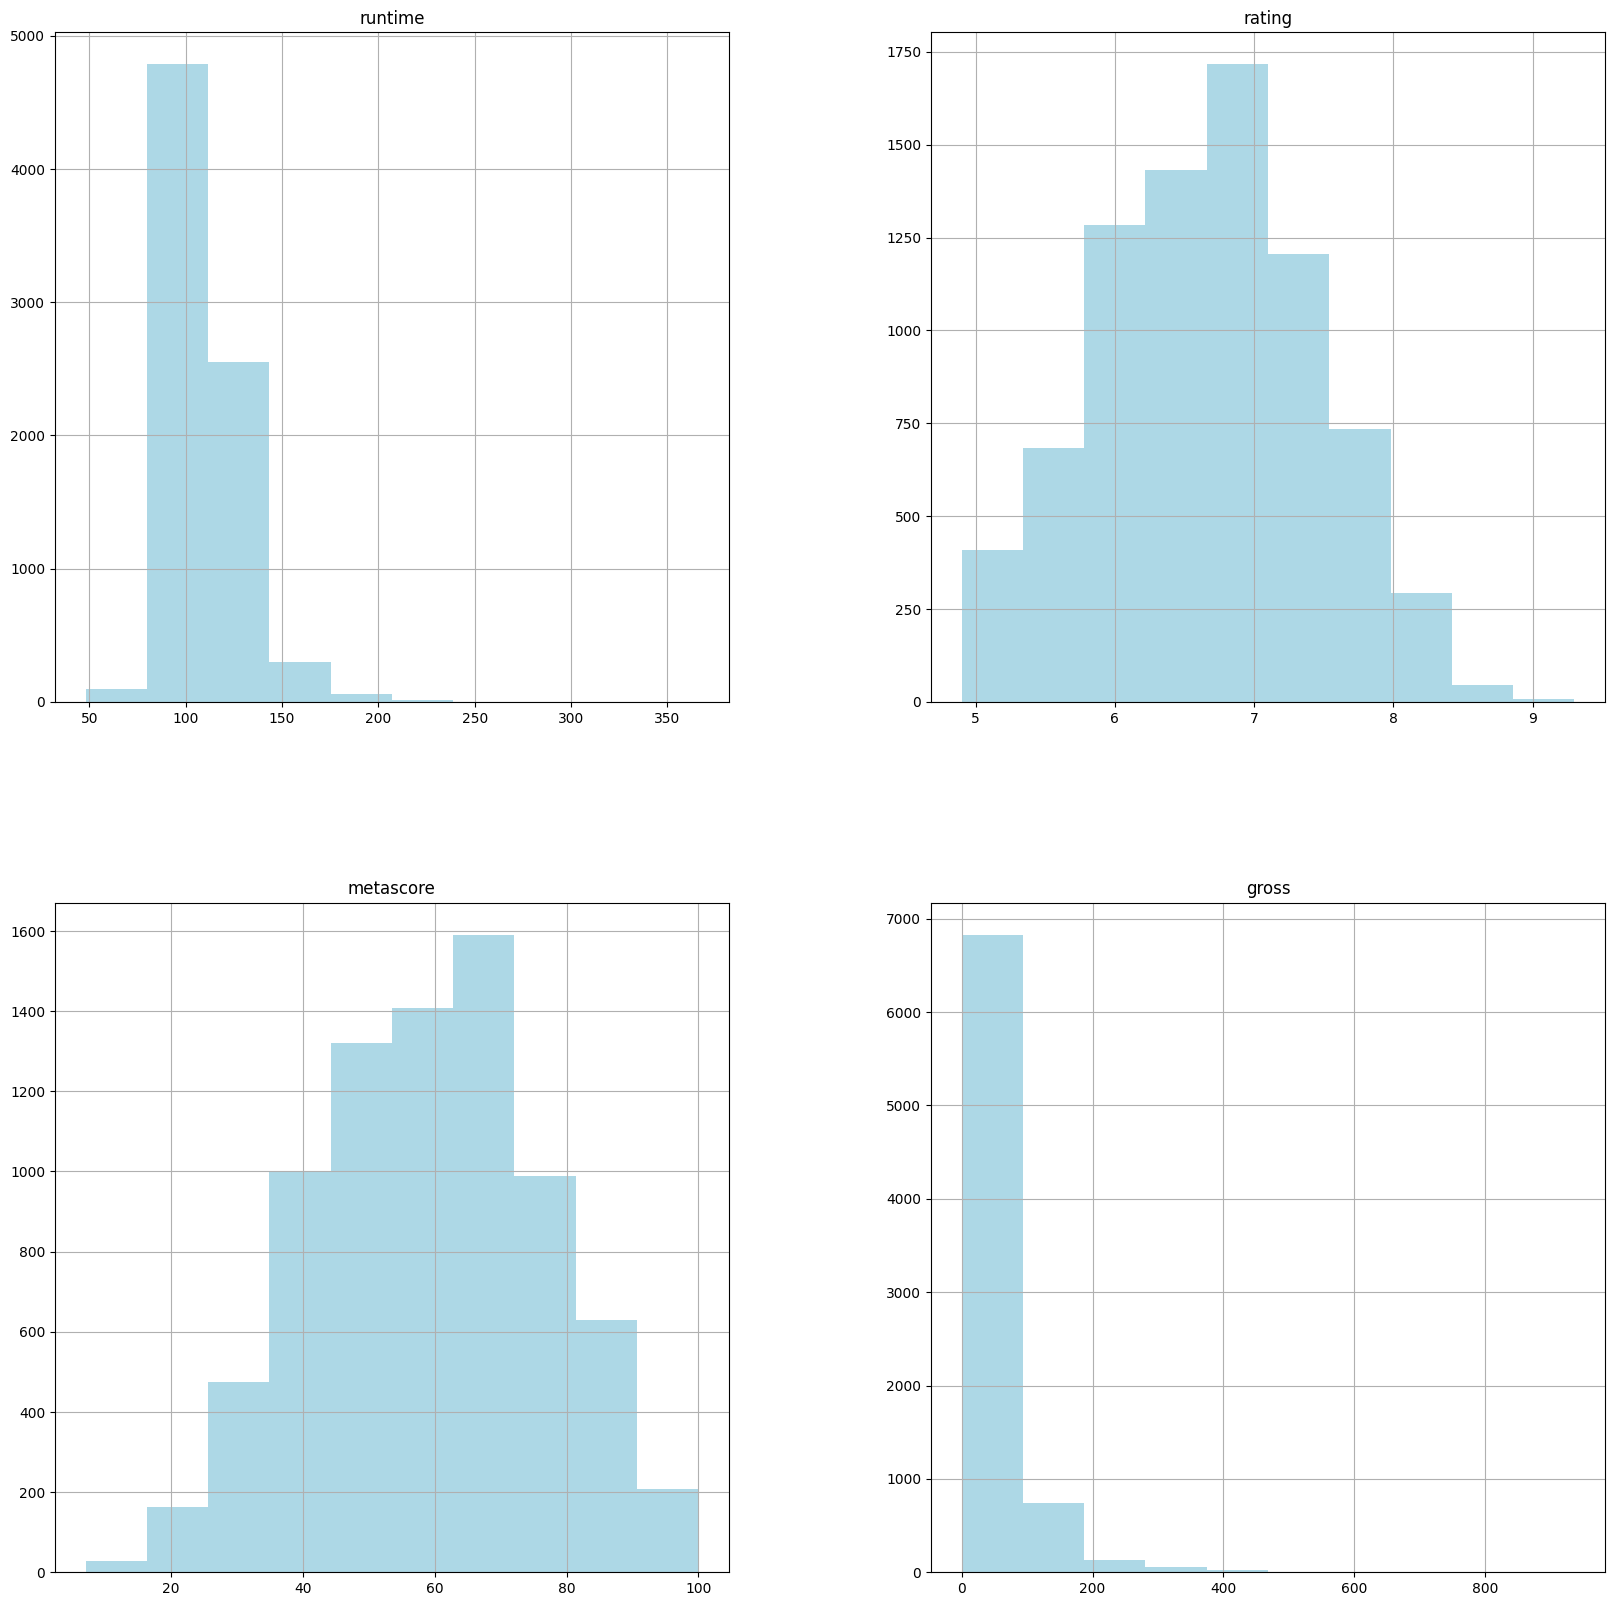

In [ ]:
#dist of original data
p = df3.hist(figsize = (20,20),color='lightblue')

In [ ]:
import seaborn as sns

def boxplot_outlier(Feature_name):
    # Create a figure with two subplots arranged horizontally
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot the boxplot before median imputation
    sns.boxplot(df3[Feature_name], ax=axs[0],color='lightskyblue')
    axs[0].set_title(f"Box Plot for {Feature_name} (Before)")

    q1 = df3[Feature_name].quantile(0.25)
    q3 = df3[Feature_name].quantile(0.75)
    iqr = q3 - q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr

    if Feature_name == 'gross':
      m = round(np.median(df3[Feature_name]), 1)
    else:
      m = round(np.mean(df3[Feature_name]), 1)

    df3.loc[(df3[Feature_name] > Upper_tail) | (df3[Feature_name] < Lower_tail), Feature_name] = m

    # Plot the boxplot after median imputation
    sns.boxplot(df3[Feature_name], ax=axs[1],color='gold')
    axs[1].set_title(f"Box Plot for {Feature_name} (After)")

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


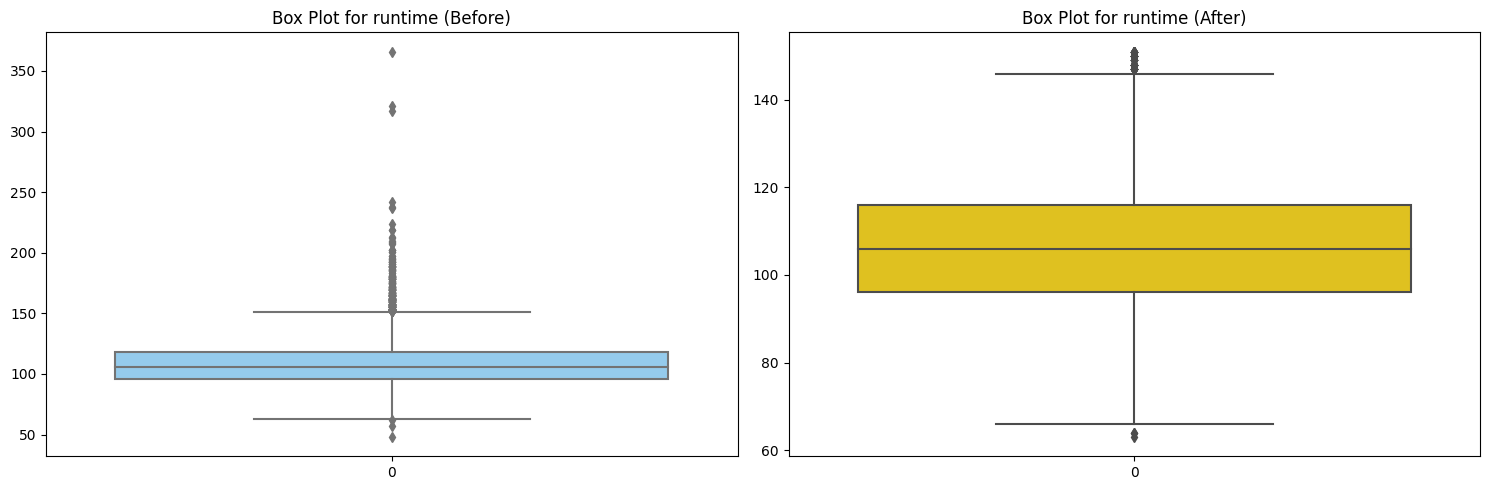

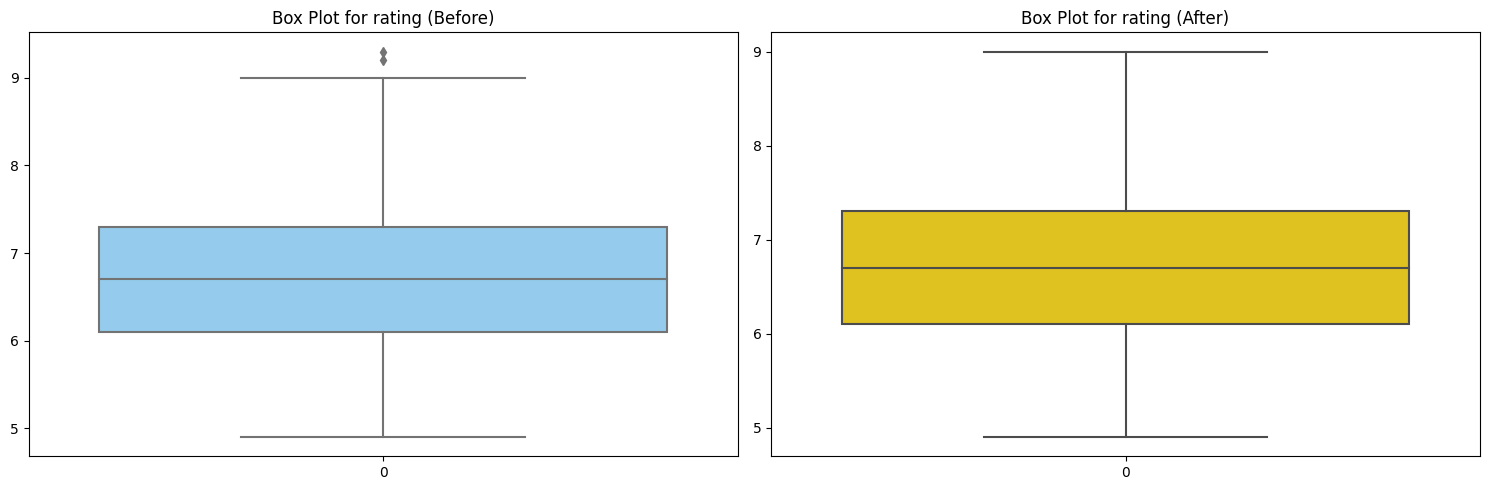

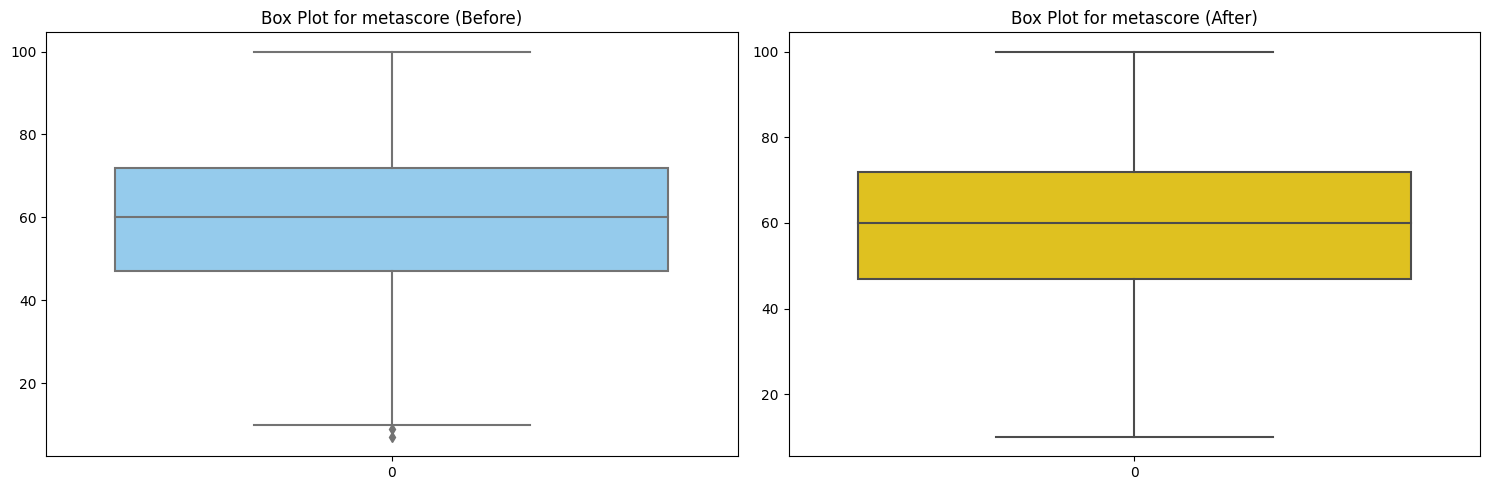

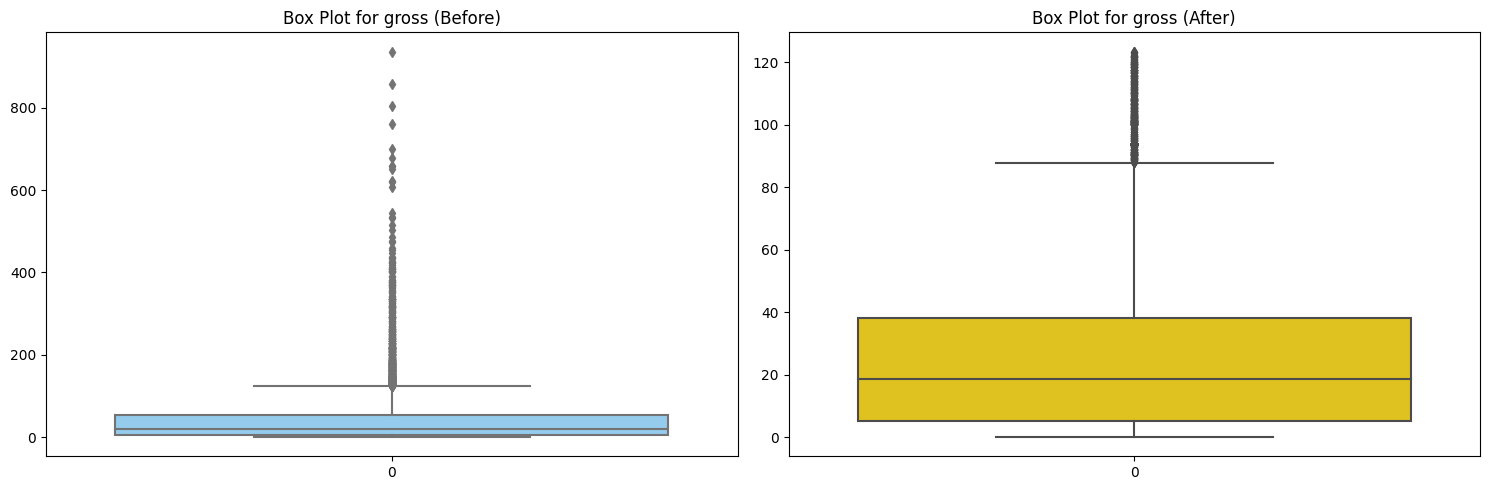

In [ ]:
columns_to_process = [col for col in df3.columns if col not in ['title', 'genre', 'year']]

for column in columns_to_process:
  boxplot_outlier(column)

In [ ]:
#save the cleaned and processed datafame into csv file
#df3.to_csv('/content/CleanedIMDB.csv', index=False)
#from google.colab import files
#files.download('/content/CleanedIMDB.csv')

#Summary statistics

In [ ]:
stats = df3.describe()
stats.drop('count', inplace=True)
stats.rename(index={'50%': 'median'}, inplace=True)

stats

,runtime,rating,metascore,gross
mean,107.202919,6.668173,59.082217,26.781538
std,14.989388,0.779846,17.234651,28.301639
min,63.000000,4.900000,10.000000,0.000000
25%,96.000000,6.100000,47.000000,5.020000
median,106.000000,6.700000,60.000000,18.560000
75%,116.000000,7.300000,72.000000,38.210000
max,151.000000,9.000000,100.000000,123.480000


In [ ]:
expanded_df = df3.copy()

# Split the 'genre' column by ',' and expand it into separate columns
expanded_df['genre'] = expanded_df['genre'].str.split(',')
expanded_df['genre'] = expanded_df['genre'].apply(lambda x: [genre.strip() for genre in x])

# Use the explode function to create separate rows for each genre
expanded_df = expanded_df.explode('genre', ignore_index=True)

expanded_df

,title,genre,year,runtime,rating,metascore,gross
0,The Shawshank Redemption,Drama,1994,142.0,6.7,82.0,28.34
1,The Godfather,Crime,1972,109.2,6.7,100.0,18.60
2,The Godfather,Drama,1972,109.2,6.7,100.0,18.60
3,The Dark Knight,Action,2008,109.2,9.0,84.0,18.60
4,The Dark Knight,Crime,2008,109.2,9.0,84.0,18.60
...,...,...,...,...,...,...,...
20200,Boat Trip,Comedy,2002,94.0,4.9,18.0,8.59
20201,Did You Hear About the Morgans?,Comedy,2009,103.0,4.9,27.0,29.58
20202,Did You Hear About the Morgans?,Drama,2009,103.0,4.9,27.0,29.58
20203,Did You Hear About the Morgans?,Romance,2009,103.0,4.9,27.0,29.58


In [ ]:
unique_genres = expanded_df['genre'].unique()

# Create an empty dictionary to store DataFrames for each genre
genre_dataframes = {}

for genre in unique_genres:
    genre_dataframes[genre.strip()] = expanded_df[expanded_df['genre'] == genre]


In [ ]:
unique_genres

array(['Drama', 'Crime', 'Action', 'Biography', 'History', 'Adventure',
       'Sci-Fi', 'Romance', 'Western', 'Fantasy', 'Mystery', 'Thriller',
       'War', 'Animation', 'Family', 'Comedy', 'Horror', 'Music',
       'Film-Noir', 'Sport', 'Musical'], dtype=object)

Rating Statistic

In [ ]:
import statistics

# Calculate summary statistics for each genre
genre_statistics = {}

for genre, genre_df in genre_dataframes.items():
    summary_stats = {
        'Mean Rating': genre_df['rating'].mean(),
        'Median Rating': genre_df['rating'].median(),
        'Mode Rating': statistics.mode(genre_df['rating']),
        'Variance Rating': genre_df['rating'].var(),
        'Standard Deviation Rating': genre_df['rating'].std()
    }

    genre_statistics[genre] = summary_stats

# Print summary statistics for each genre
for genre, stats in genre_statistics.items():
    print(f'Summary Statistics for {genre}:')
    for stat, value in stats.items():
        print(f'{stat}: {value:.2f}' if isinstance(value, (float, int)) else f'{stat}: {value}')
    print()



Summary Statistics for Drama:
Mean Rating: 6.87
Median Rating: 6.90
Mode Rating: 7.30
Variance Rating: 0.52
Standard Deviation Rating: 0.72

Summary Statistics for Crime:
Mean Rating: 6.70
Median Rating: 6.70
Mode Rating: 6.40
Variance Rating: 0.55
Standard Deviation Rating: 0.74

Summary Statistics for Action:
Mean Rating: 6.49
Median Rating: 6.40
Mode Rating: 6.10
Variance Rating: 0.60
Standard Deviation Rating: 0.78

Summary Statistics for Biography:
Mean Rating: 7.07
Median Rating: 7.10
Mode Rating: 7.30
Variance Rating: 0.33
Standard Deviation Rating: 0.58

Summary Statistics for History:
Mean Rating: 7.03
Median Rating: 7.10
Mode Rating: 7.30
Variance Rating: 0.40
Standard Deviation Rating: 0.63

Summary Statistics for Adventure:
Mean Rating: 6.61
Median Rating: 6.60
Mode Rating: 6.50
Variance Rating: 0.66
Standard Deviation Rating: 0.81

Summary Statistics for Sci-Fi:
Mean Rating: 6.48
Median Rating: 6.40
Mode Rating: 6.60
Variance Rating: 0.64
Standard Deviation Rating: 0.80

S

Metascore Statistic

In [ ]:
import statistics

# Calculate summary statistics for each genre
genre_statistics = {}

for genre, genre_df in genre_dataframes.items():
    summary_stats = {

        'Mean Metascore': genre_df['metascore'].mean(),
        'Median Metascore': genre_df['metascore'].median(),
        'Mode Metascore': statistics.multimode(genre_df['metascore']),
        'Variance Metascore': genre_df['metascore'].var(),
        'Standard Deviation Metascore': genre_df['metascore'].std()
    }
    genre_statistics[genre] = summary_stats

# Print summary statistics for each genre
for genre, stats in genre_statistics.items():
    print(f'Summary Statistics for {genre}:')
    for stat, value in stats.items():
        print(f'{stat}: {value:.2f}' if isinstance(value, (float, int)) else f'{stat}: {value}')
    print()



Summary Statistics for Drama:
Mean Metascore: 63.18
Median Metascore: 64.00
Mode Metascore: [65.0, 61.0, 64.0]
Variance Metascore: 280.33
Standard Deviation Metascore: 16.74

Summary Statistics for Crime:
Mean Metascore: 58.41
Median Metascore: 59.00
Mode Metascore: [66.0]
Variance Metascore: 285.57
Standard Deviation Metascore: 16.90

Summary Statistics for Action:
Mean Metascore: 53.37
Median Metascore: 52.50
Mode Metascore: [49.0]
Variance Metascore: 246.96
Standard Deviation Metascore: 15.71

Summary Statistics for Biography:
Mean Metascore: 64.74
Median Metascore: 65.00
Mode Metascore: [76.0]
Variance Metascore: 203.32
Standard Deviation Metascore: 14.26

Summary Statistics for History:
Mean Metascore: 65.06
Median Metascore: 66.50
Mode Metascore: [74.0]
Variance Metascore: 240.76
Standard Deviation Metascore: 15.52

Summary Statistics for Adventure:
Mean Metascore: 57.66
Median Metascore: 58.00
Mode Metascore: [51.0]
Variance Metascore: 258.88
Standard Deviation Metascore: 16.09


Gross

In [ ]:
import statistics

genre_statistics = {}

for genre, genre_df in genre_dataframes.items():
    summary_stats = {

        'Mean Gross': genre_df['gross'].mean(),
        'Median Gross': genre_df['gross'].median(),
        'Mode Gross': statistics.multimode(genre_df['gross']),
        'Variance Gross': genre_df['gross'].var(),
        'Standard Deviation Gross': genre_df['gross'].std()
    }
    genre_statistics[genre] = summary_stats

# Print summary statistics for each genre
for genre, stats in genre_statistics.items():
    print(f'Summary Statistics for {genre}:')
    for stat, value in stats.items():
        print(f'{stat}: {value:.2f}' if isinstance(value, (float, int)) else f'{stat}: {value}')
    print()



Summary Statistics for Drama:
Mean Gross: 22.30
Median Gross: 12.64
Mode Gross: [18.6]
Variance Gross: 694.02
Standard Deviation Gross: 26.34

Summary Statistics for Crime:
Mean Gross: 23.89
Median Gross: 16.16
Mode Gross: [18.6]
Variance Gross: 704.17
Standard Deviation Gross: 26.54

Summary Statistics for Action:
Mean Gross: 32.86
Median Gross: 19.49
Mode Gross: [18.6]
Variance Gross: 889.00
Standard Deviation Gross: 29.82

Summary Statistics for Biography:
Mean Gross: 23.50
Median Gross: 14.74
Mode Gross: [31.86]
Variance Gross: 649.24
Standard Deviation Gross: 25.48

Summary Statistics for History:
Mean Gross: 22.06
Median Gross: 12.64
Mode Gross: [18.6, 17.29]
Variance Gross: 664.98
Standard Deviation Gross: 25.79

Summary Statistics for Adventure:
Mean Gross: 35.41
Median Gross: 19.48
Mode Gross: [18.6]
Variance Gross: 910.21
Standard Deviation Gross: 30.17

Summary Statistics for Sci-Fi:
Mean Gross: 28.71
Median Gross: 18.60
Mode Gross: [18.6]
Variance Gross: 758.82
Standard Dev

# DataFrame (Rating, Metascore, Gross)

 <FONT COLOR="blue "  >
 **Table of Rating Statistic**



In [ ]:
# Initialize an empty list to store the summary statistics dictionaries
summary_stats_list_r = []

for genre, genre_df in genre_dataframes.items():
    summary_stats = {
        'Genre': genre,
        'Mean': genre_df['rating'].mean(),
        'Median': genre_df['rating'].median(),
        'Mode': statistics.multimode(genre_df['rating']),
        'Variance': genre_df['rating'].var(),
        'Standard Deviation': genre_df['rating'].std()
    }

    # Append the summary statistics dictionary to the list
    summary_stats_list_r.append(summary_stats)


# Create a DataFrame from the list of summary statistics dictionaries
Rating_stat_df = pd.DataFrame(summary_stats_list_r)

# Set 'Genre' as the index column for better display
Rating_stat_df.set_index('Genre', inplace=True)


Rating_stat_df

,Mean,Median,Mode,Variance,Standard Deviation
Genre,,,,,
Drama,6.874586,6.9,[7.3],0.522112,0.722573
Crime,6.700888,6.7,[6.4],0.546323,0.739137
Action,6.485097,6.4,[6.1],0.602922,0.776481
Biography,7.071624,7.1,[7.3],0.332173,0.576344
History,7.028244,7.1,"[7.3, 7.2]",0.397054,0.630122
Adventure,6.610598,6.6,[6.5],0.655162,0.809421
Sci-Fi,6.481456,6.4,"[6.6, 6.4]",0.644708,0.802937
Romance,6.637638,6.7,[6.4],0.526544,0.725633
Western,7.168182,7.2,[7.6],0.477137,0.690751


 <FONT COLOR="blue "  >
 **Table of Metascore Statistic**



In [ ]:
# Initialize an empty list to store the summary statistics dictionaries
summary_stats_list_m = []

for genre, genre_df in genre_dataframes.items():
    summary_stats = {
        'Genre': genre,
        'Mean': genre_df['metascore'].mean(),
        'Median': genre_df['metascore'].median(),
        'Mode': statistics.multimode(genre_df['metascore']),
        'Variance': genre_df['metascore'].var(),
        'Standard Deviation': genre_df['metascore'].std()
    }

    # Append the summary statistics dictionary to the list
    summary_stats_list_m.append(summary_stats)


# Create a DataFrame from the list of summary statistics dictionaries
Metascore_stat_df = pd.DataFrame(summary_stats_list_m)

# Set 'Genre' as the index column for better display
Metascore_stat_df.set_index('Genre', inplace=True)


Metascore_stat_df

,Mean,Median,Mode,Variance,Standard Deviation
Genre,,,,,
Drama,63.180454,64.0,"[65.0, 61.0, 64.0]",280.327094,16.742971
Crime,58.408629,59.0,[66.0],285.570059,16.898818
Action,53.366091,52.5,[49.0],246.960449,15.714975
Biography,64.740171,65.0,[76.0],203.322784,14.259130
History,65.057252,66.5,[74.0],240.759162,15.516416
Adventure,57.655443,58.0,[51.0],258.884233,16.089880
Sci-Fi,56.111092,56.0,[66.0],253.026891,15.906819
Romance,58.439926,58.0,[63.0],305.621839,17.482043
Western,69.704545,69.5,[65.0],246.302508,15.694028


 <FONT COLOR="blue "  >
 **Table of Gross Statistic**



In [ ]:
import pandas as pd
import statistics

# Initialize an empty list to store the summary statistics dictionaries
summary_stats_list_g = []

for genre, genre_df in genre_dataframes.items():
    summary_stats = {
        'Genre': genre,
        'Mean': genre_df['gross'].mean(),
        'Median': genre_df['gross'].median(),
        'Mode': statistics.multimode(genre_df['gross']),
        'Variance': genre_df['gross'].var(),
        'Standard Deviation': genre_df['gross'].std()
    }

    # Append the summary statistics dictionary to the list
    summary_stats_list_g.append(summary_stats)


# Create a DataFrame from the list of summary statistics dictionaries
Gross_stat_df = pd.DataFrame(summary_stats_list_g)

# Set 'Genre' as the index column for better display
Gross_stat_df.set_index('Genre', inplace=True)


Gross_stat_df

,Mean,Median,Mode,Variance,Standard Deviation
Genre,,,,,
Drama,22.295844,12.640,[18.6],694.021657,26.344291
Crime,23.888541,16.155,[18.6],704.169739,26.536197
Action,32.857900,19.495,[18.6],888.996011,29.816036
Biography,23.498829,14.740,[31.86],649.244499,25.480277
History,22.060897,12.640,"[18.6, 17.29]",664.981342,25.787232
Adventure,35.409787,19.480,[18.6],910.213699,30.169748
Sci-Fi,28.712912,18.600,[18.6],758.818009,27.546652
Romance,24.067247,14.450,[18.6],724.808919,26.922276
Western,19.098693,12.055,[18.6],513.073671,22.651130


#Statistical analysis

**Hypothesis test**

<ipython-input-20-ba81417df83e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df3.corr()


,runtime,rating,metascore,gross
runtime,1.000000,0.305510,0.170163,0.118091
rating,0.305510,1.000000,0.716044,-0.081687
metascore,0.170163,0.716044,1.000000,-0.093892
gross,0.118091,-0.081687,-0.093892,1.000000


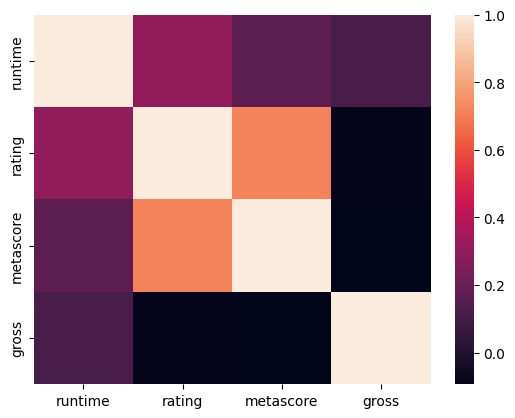

In [ ]:
#Correlation Matrix

import seaborn as sns
corr = df3.corr()
corr = (corr)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

# Hypothesis Test 1: Are Movie Ratings Shaped by Genre Preferences?

**Null Hypothesis (H0)**:  
 Genre preferences do not significantly influence the distribution of movie ratings, indicating that movie ratings are uniformly distributed across different genres.

**Alternative Hypothesis (H1)**: Genre preferences significantly influence the distribution of movie ratings, suggesting that certain genres tend to receive higher or lower ratings, and the distribution of ratings is not uniform.



P-value:  3.44645745e-314
Reject the null hypothesis. Genre preferences significantly influence ratings.



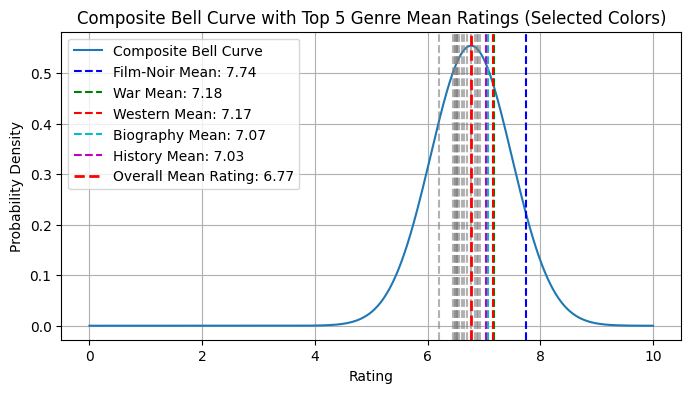

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, f_oneway

# Perform the ANOVA test
grouped_data = {}

for genre in expanded_df['genre'].unique():
    grouped_data[genre] = expanded_df[expanded_df['genre'] == genre]['rating']

statistic, p_value = f_oneway(*grouped_data.values())
print("P-value: ",p_value)
# Check the p-value to make a decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Genre preferences significantly influence ratings.")
else:
    print("Fail to reject the null hypothesis. Genre preferences do not significantly influence ratings.")
print('')

# Generate data points for the single bell curve
ratings = np.linspace(0, 10, 1000)
overall_mean = Rating_stat_df['Mean'].mean()
overall_std = Rating_stat_df['Standard Deviation'].mean()
pdf = norm.pdf(ratings, overall_mean, overall_std)

# Create the single bell curve graph with the same size as the previous graph
plt.figure(figsize=(8, 4))  # Adjust the figure size to (8, 4)

plt.plot(ratings, pdf, label="Composite Bell Curve")

# Sort genres by mean rating (top 5 and the rest)
sorted_genres = Rating_stat_df.sort_values(by='Mean', ascending=False)
top5_genres = sorted_genres.head(5)
rest_genres = sorted_genres.tail(len(sorted_genres) - 5)

# Choose colors for the top 5 genres from the genre_colors list
genre_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
top5_colors = genre_colors[:5]

# Plot vertical lines for the top 5 genres with selected colors
for (genre, row), color in zip(top5_genres.iterrows(), top5_colors):
    genre_mean = row['Mean']
    plt.axvline(x=genre_mean, linestyle='--', color=color, label=f'{genre} Mean: {genre_mean:.2f}')


# Plot vertical lines for the rest of the genres (gray)
for (genre, row) in rest_genres.iterrows():
    genre_mean = row['Mean']
    plt.axvline(x=genre_mean, linestyle='--', color='gray', alpha=0.6)


# Plot a thicker vertical line at the overall mean rating
plt.axvline(x=overall_mean, linestyle='--', color='red', linewidth=2, label=f'Overall Mean Rating: {overall_mean:.2f}')


plt.title("Composite Bell Curve with Top 5 Genre Mean Ratings (Selected Colors)")
plt.xlabel("Rating")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


# Hypothesis Test 2: Investigating whether the choice of movie genre significantly influences yearly gross revenue trends in the film industry

**Null Hypothesis (H0)**: Genre choice has no meaningful impact on yearly gross revenue.

**Alternative Hypothesis (H1)**: Yearly gross revenue trends vary significantly among movie genres, implying that genre choice plays a substantial role in revenue generation.

 <FONT COLOR="blue "  >
Aims to find Trends of Top 5 with highest Gross

P-value:  6.320611728673447e-57
Reject the null hypothesis. Genre choice significantly influences yearly gross revenue.



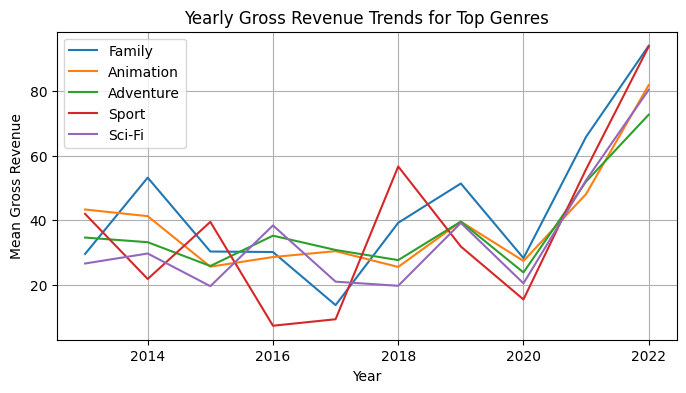

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Perform the ANOVA test
grouped_data = expanded_df.groupby(['genre', 'year'])['gross'].sum().reset_index()
statistic, p_value = f_oneway(*[grouped_data[grouped_data['genre'] == genre]['gross'] for genre in expanded_df['genre'].unique()])

print("P-value: ",p_value)
# Check the p-value to make a decision
alpha = 0.05  # Set your desired significance level
if p_value < alpha:
    print("Reject the null hypothesis. Genre choice significantly influences yearly gross revenue.")
else:
    print("Fail to reject the null hypothesis. Genre choice does not significantly influence yearly gross revenue.")
print('')


# Convert the 'year' column to integers
expanded_df['year'] = expanded_df['year'].astype(int)

# Filter the data for the recent 10 years (e.g., 2013-2022)
recent_years_data = expanded_df[expanded_df['year'] >= 2013]

# Group the data by 'year' and 'genre' and calculate the mean gross revenue
grouped_data = recent_years_data.groupby(['year', 'genre'])['gross'].mean().reset_index()

# Select the top genres with the highest mean yearly gross revenue (e.g., top 5)
top_genres = grouped_data.groupby('genre')['gross'].mean().nlargest(5).index.tolist()

# Filter the data to include only the top genres
filtered_data = grouped_data[grouped_data['genre'].isin(top_genres)]

# Visualize the results using a line graph
plt.figure(figsize=(8, 4))  # Adjust the figure size
for genre in top_genres:
    genre_data = filtered_data[filtered_data['genre'] == genre]
    plt.plot(genre_data['year'], genre_data['gross'], label=genre)

plt.title("Yearly Gross Revenue Trends for Top Genres")
plt.xlabel("Year")
plt.ylabel("Mean Gross Revenue")
plt.legend()
plt.grid(True)
plt.show()


 <FONT COLOR="blue "  > **Try to Predict future trend with Liniear Regression**

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


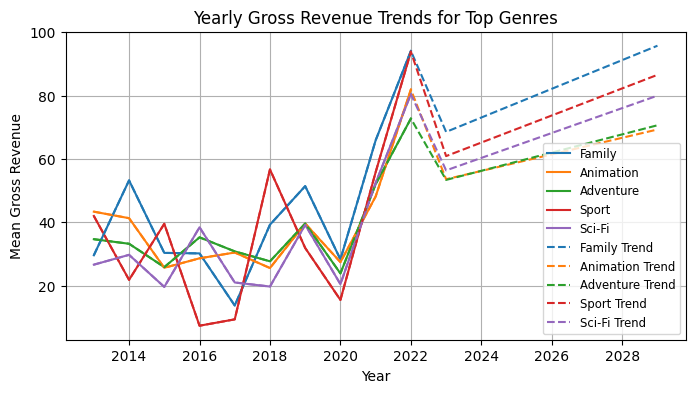

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# ----------------------------- FROM ABOVE------------------------------

# Assuming you have loaded and processed your data into expanded_df
expanded_df['year'] = expanded_df['year'].astype(int)

recent_years_data = expanded_df[expanded_df['year'] >= 2013]

grouped_data = recent_years_data.groupby(['year', 'genre'])['gross'].mean().reset_index()

top_genres = grouped_data.groupby('genre')['gross'].mean().nlargest(5).index.tolist()

filtered_data = grouped_data[grouped_data['genre'].isin(top_genres)]

anova_results = {}
for genre in top_genres:
    genre_data = filtered_data[filtered_data['genre'] == genre]
    anova_result = f_oneway(*[genre_data[genre_data['year'] == year]['gross'] for year in genre_data['year'].unique()])
    anova_results[genre] = anova_result

# ----------------------------- PREDICTION ----------------------------------------

# Create a dictionary to store predicted trend colors and line types
trend_styles = {}

# Define colors for dashed prediction lines using color codes
prediction_colors = {
    'Family': '#2078b4',
    'Animation': '#ff7f0e',
    'Adventure': '#2da02d',
    'Sport': '#d62728',
    'Sci-Fi': '#9467bd',
}

# Visualize the results using a line graph
plt.figure(figsize=(8, 4))
for genre in top_genres:
    genre_data = filtered_data[filtered_data['genre'] == genre]
    plt.plot(genre_data['year'], genre_data['gross'], label=genre)

# Predict and plot future trends, connecting them to the existing lines
future_years = np.arange(2023, 2030)
for genre in top_genres:
    genre_data = filtered_data[filtered_data['genre'] == genre]
    X = genre_data['year'].values.reshape(-1, 1)
    y = genre_data['gross'].values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    future_gross = model.predict(future_years.reshape(-1, 1))

    # Plot the predicted trend, connecting it to the existing line
    plt.plot(np.concatenate((genre_data['year'], future_years)),
             np.concatenate((genre_data['gross'], future_gross.flatten())),
             linestyle='--', color=prediction_colors.get(genre, 'k'), label=f'{genre} Trend')

# --------------------------------------------------------------------------------------------

plt.title("Yearly Gross Revenue Trends for Top Genres")
plt.xlabel("Year")
plt.ylabel("Mean Gross Revenue")

# Resize the legend to be smaller
plt.legend(fontsize='small')

plt.grid(True)

# Print the predicted trend styles
for genre, style in trend_styles.items():
    color, linestyle = style
    trend_type = "Increase" if color in prediction_colors.values() else "Decrease"
    print(f"Predicted Trend for {genre}: {trend_type} (Color: {color}, Line Style: {linestyle})")

plt.show()


#Poisson Distribution

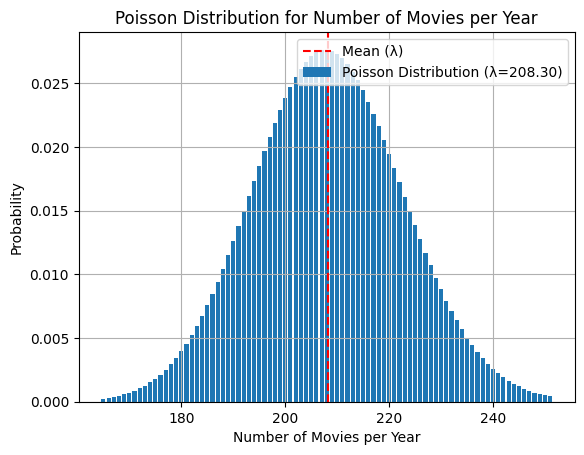

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Calculate the average number of movies per year (lambda value)
expanded_df['year'] = expanded_df['year'].astype(int)
lambda_value = expanded_df['year'].value_counts().mean()

# Generate a reasonable range for the number of movies
num_movies = np.arange(int(lambda_value - 3*np.sqrt(lambda_value)), int(lambda_value + 3*np.sqrt(lambda_value)) + 1)

# Calculate the Poisson probability mass function (PMF)
pmf = poisson.pmf(num_movies, lambda_value)

# Plot the Poisson distribution
plt.bar(num_movies, pmf, label=f'Poisson Distribution (λ={lambda_value:.2f})')
plt.xlabel('Number of Movies per Year')
plt.ylabel('Probability')
plt.title('Poisson Distribution for Number of Movies per Year')
plt.axvline(x=lambda_value, color='r', linestyle='--', label='Mean (λ)')
plt.legend()
plt.grid(True)
plt.show()

#Cumulative Probabilty by Z-score

Z-score: 0.4255031295802672
Cumulative probability of movies with rating > 7: 0.33523497034189753


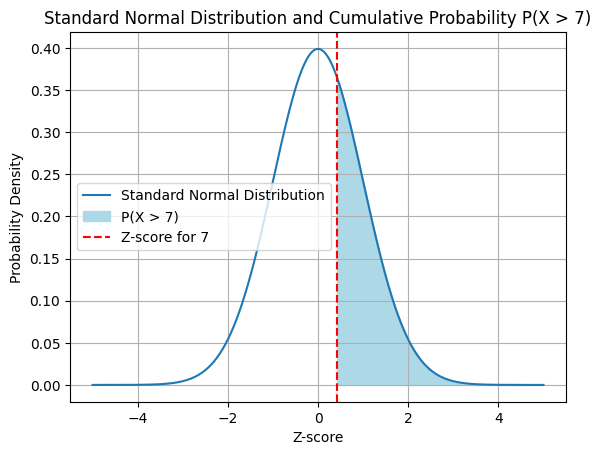

In [ ]:
import scipy.stats as stats

# Given rating of interest
rating_of_interest = 7.0

# Calculate the mean and standard deviation of ratings
mean_rating = df3['rating'].mean()
std_dev_rating = df3['rating'].std()

# Calculate the Z-score for the given rating
z_score = (rating_of_interest - mean_rating) / std_dev_rating

# Find the cumulative probability for Z > z_score (rating > 7)
cumulative_probability_above_7 = 1 - stats.norm.cdf(z_score)

print("Z-score:", z_score)
print("Cumulative probability of movies with rating > 7:", cumulative_probability_above_7)

# Plot the Z-distribution
z_values = np.linspace(-5, 5, 500)  # Adjust the range as needed
pdf_values = stats.norm.pdf(z_values, 0, 1)  # mean=0, std=1 for standard normal
plt.plot(z_values, pdf_values, label='Standard Normal Distribution')
plt.fill_between(z_values[z_values > z_score], pdf_values[z_values > z_score], color='lightblue', label='P(X > 7)')
plt.axvline(x=z_score, color='r', linestyle='--', label='Z-score for 7')

plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution and Cumulative Probability P(X > 7)')
plt.legend()
plt.grid(True)
plt.show()

#Data Visualization

Genre Word Cloud

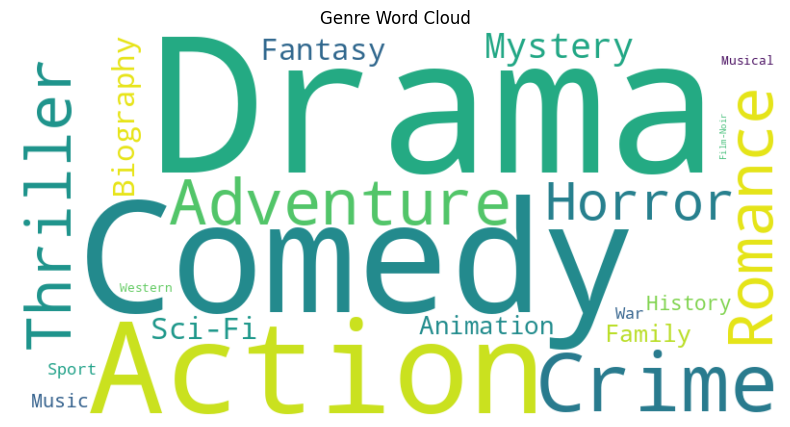

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

genre_counts = expanded_df['genre'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()


Genre Popularity Heatmap Over time

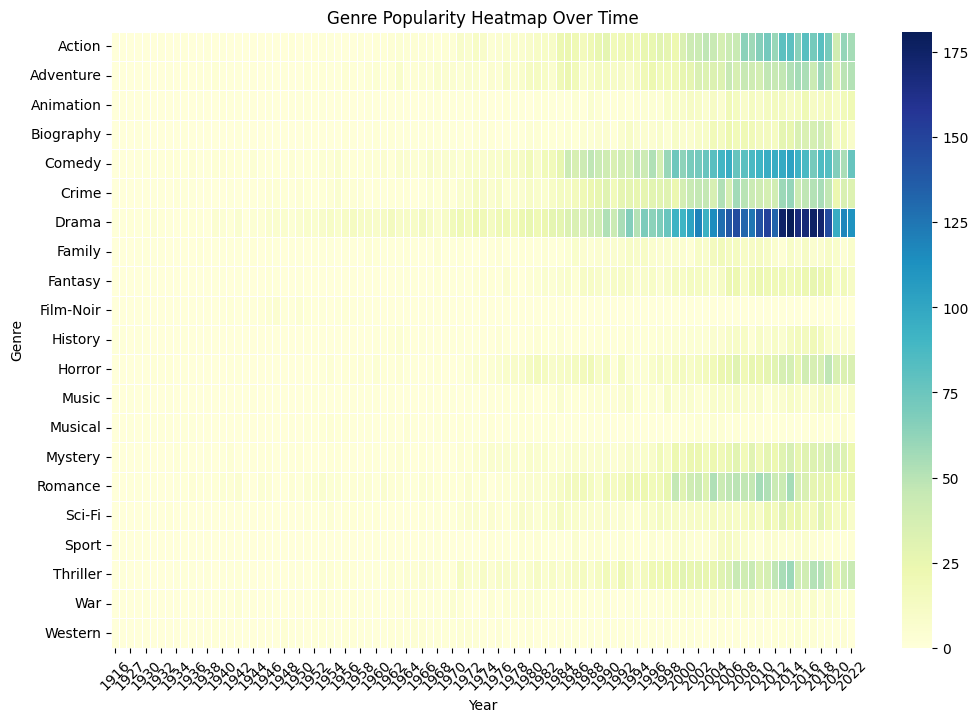

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a genre-popularity matrix
genre_popularity = expanded_df.pivot_table(index='genre', columns='year', values='title', aggfunc='count', fill_value=0)

# Create the heatmap with color map
plt.figure(figsize=(12, 8))
sns.heatmap(genre_popularity, cmap='YlGnBu', annot=False, fmt='d', linewidths=0.5)
plt.title('Genre Popularity Heatmap Over Time')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.xticks(rotation=45)

plt.show()


Distribution of movies based on their genre in the last 5 decades

In [ ]:
import plotly.graph_objs as go

years_to_plot = [1980, 1990, 2000, 2010, 2020]
filtered_data = expanded_df[expanded_df['year'].isin(years_to_plot)]

# Group by Year and Genre, then count the occurrences of each genre for each year
genre_distribution = filtered_data.groupby(['year', 'genre']).size().unstack().fillna(0)

custom_colors = {
    'Drama': '#FF69B4',
    'Crime': '#FF8C00',
    'Action': '#FF206E',
    'Biography': '#8A2BE2',
    'History': '#FF7F50',
    'Adventure': '#7FFF00',
    'Sci-Fi': '#40E0D0',
    'Romance': '#FF1493',
    'Western': '#FF4500',
    'Fantasy': '#FF5733',
    'Mystery': '#8A2BE2',
    'Thriller': '#7B68EE',
    'War': '#00FA9A',
    'Animation': '#20B2AA',
    'Family': '#32CD32',
    'Comedy': '#FFD700',
    'Horror': '#8B008B',
    'Music': '#9932CC',
    'Film-Noir': '#2F4F4F',
    'Sport': '#FF4500',
    'Musical': '#FF4500'
}

# Create a horizontal stacked bar chart
fig = go.Figure()

for genre in genre_distribution.columns:
    color = custom_colors.get(genre, 'rgb(169, 169, 169)')  # Use a default color if not specified
    fig.add_trace(go.Bar(
        y=genre_distribution.index,
        x=genre_distribution[genre],
        name=genre,
        orientation='h',
        marker_color=color  # Assign the custom color
    ))


fig.update_layout(
    title="Genre Distribution in the Last 5 decades",
    xaxis_title="Number of Movies",
    yaxis_title="Year",
    barmode='stack',
    legend=dict(
        orientation='v',
        traceorder='normal',
        x=1.15,  # Adjust the x position to place the legend at the right side
        y=1.0,  # Adjust the y position
        itemsizing='constant',  # Maintain constant item size
        bordercolor='black',  # Add border color to improve visibility
        borderwidth=1,  # Border width
        xanchor='right',  # Anchor to the right
        yanchor='top'  # Anchor to the top
    ),
    margin=dict(t=50, r=100)  # Adjust the top and right margins for space
)

fig.show()

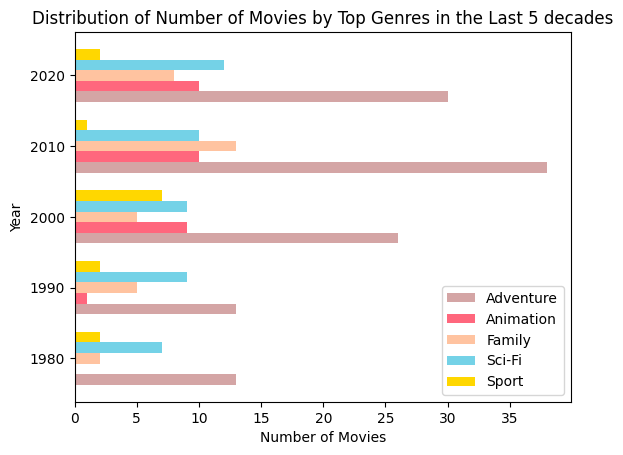

In [ ]:
# Filter data for the specified years and genres
desired_years = [1980,1990,2000,2010,2020]
desired_genres = ['Family', 'Animation', 'Adventure', 'Sport', 'Sci-Fi']
filtered_data = expanded_df[(expanded_df['year'].isin(desired_years)) & (expanded_df['genre'].isin(desired_genres))]

# Group by year and genre, then count the occurrences of each genre for each year
genre_distribution = filtered_data.groupby(['year', 'genre']).size().unstack().fillna(0)

custom_colors = {
    'Family': '#FFC3A0',
    'Animation': '#FF677D',
    'Adventure': '#D4A5A5',
    'Sport': '#FFD700',
    'Sci-Fi': '#74D2E7'
}
# Create a grouped horizontal bar chart with shaded colors
fig, ax = plt.subplots()

bar_width = 0.15  # Width of each bar
years = len(desired_years)
index = np.arange(years)  # Adjusted to use the number of years

for i, genre in enumerate(genre_distribution.columns):
    color = custom_colors.get(genre, 'gray')
    ax.barh(index + i * bar_width, genre_distribution[genre], bar_width, label=genre, color=color)

# Customize the plot
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Year')
ax.set_yticks(index + bar_width * (len(genre_distribution.columns) - 1) / 2)
ax.set_yticklabels([str(year) for year in desired_years])
ax.legend()
ax.set_title('Distribution of Number of Movies by Top Genres in the Last 5 decades')

plt.show()